<h1 align='center'> COMP2420/COMP6420 - Introduction to Data Management, Analysis and Security</h1>

<h2 align='center'> Lab 05 - Data Analysis: Classification </h2>

*****

## Aim
Our aim in this lab is:
- Understand and implement a logistic regression model for classification
- Understand and implement a k-Nearest Neighbour model for classification
- Compare the two classification techniques and understand the capabilities and pitfalls of each

*****

## Learning Outcomes
- L03: Demonstrate basic knowledge and understanding of descriptive and predictive data analysis methods, optimization and search, and knowledge representation.
- L04: Formulate and extract descriptive and predictive statistics from data
- L05: Analyse and interpret results from descriptive and predictive data analysis
- L06: Apply their knowledge to a given problem domain and articulate potential data analysis problems

***

## Preparation

Before starting this lab, we suggest you complete the following:
- Watch the lectures this week
- Complete Lab04 in particular and become familiar with Scikit-Learn's modules


The following functions may be useful for this lab:

| Function                     | Description |
| ---:                         | :---        |
| `LogisticRegression()`, `KNeighborsClassifier()` | create an instance of a classification module |
| `LabelEncoder()`, `StandardScaler()` | create an instance of a pre-processing module |

We have not included functions described in previous labs (especially those used to fit, predict and score models) as we expect you to be familiar with those.

***

In [1]:
# imports
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression     # Logistic Regression
from sklearn.neighbors import KNeighborsClassifier      # k-Nearest Neighbours
from sklearn.preprocessing import LabelEncoder          # encooding variables
from sklearn.preprocessing import StandardScaler        # encooding variables
from sklearn.model_selection import train_test_split    # testing our models
from sklearn.metrics import confusion_matrix            # scoring

import matplotlib.pyplot as plt    # plotting, if you need it
import seaborn as sns
plt.style.use('seaborn')

### Exercise 1: Not-So-Linear Regression

In 1912, the British passenger liner *RMS Titanic* hit an iceberg and sank. Many of the passengers died, and the event is considered to be one of the deadliest marine disasters. Today, we'll be analysing the statistics of the passengers to understand the factors that led to their survivability. We'd like to **predict (or rather, classify) whether a passenger would live or die** depending on factors such as age, gender and passenger class. Here's a description of the columns:

| Name           | Description |
| ---:           | :---        |
| `PassengerId`  | an arbitrary ID assigned to each passenger |
| `Survived`     | status of passenger's survival<br>(`0`=No, `1`=Yes) |
| `Pclass`       | passenger's ticket class<br>(`1`=Upper, `2`=Middle, `3`=Lower) |
| `Name`         | full title and name of passenger |
| `Sex`          | gender of passenger |
| `Age`          | age of passenger<br>fractional if less than 1, xx.5 if estimated |
| `SibSp`        | number of siblings and spouses aboard<br>brother / sister / stepbrother / stepsister / husband / wife |
| `Parch`        | number of parents and children aboard<br>mother / father / daughter / son / stepdaughter / stepson |
| `Ticket`       | ticket ID |
| `Fare`         | passenger fare ($) |
| `Cabin`        | cabin number |
| `Embarked`     | port of embarkation<br>(`C`=Cherbourg, `Q`=Queenstown, `S`=Southampton) |

This data was collected from <a href="https://www.kaggle.com/c/titanic">Kaggle</a>.

In previous labs, we've given you a lot of guidance on how to deal with data - missing values, choosing your columns, etc. This time we'll give you the freedom (and responsibility) of deciding this for yourself. In making these decisions, feel free to consult classmates, tutors, previous labs and lectures, and online research as necessary.

#### 1.1 Preparing the Data
First, we'll need to **import the data**. The data is in the file `data/titanic.csv`; save it to an object named `titanic` and view the first ten rows.

In [2]:
def import_data(url):
    """ 
    Import data from an address.
            Parameters:
                    url (string): File path for the data.
            Returns:
                    data (DataFrame): A dataframe of the data.
    """
    #TODO
    data = pd.read_csv(url)
    return data

def first_ten_rows_inspection(data):
    """ 
    Inspect the first ten rows. 
            Parameters:
                    data (DataFrame): A dataframe of the data.
            Returns:
                    None.
    """
    print(data.head(10))
    
titanic = import_data("data/titanic.csv")
first_ten_rows_inspection(titanic)

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54

What are your first impressions from this data? You may wish to do some further data exploration (for example, finding missing values, the distribution of data, descriptive statistics) to help you understand what you're dealing with.

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


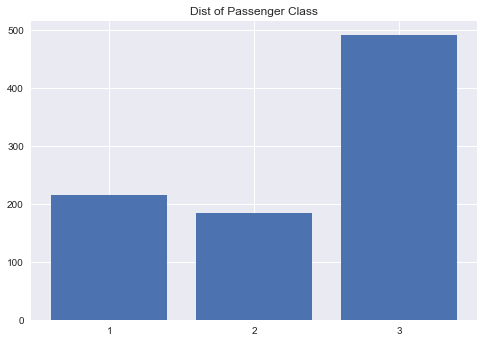

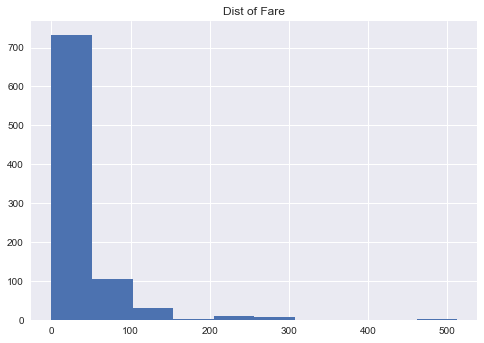

Nulls per column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [3]:
# TODO: explore the data
print(titanic.describe())

# plot pclass
classes = np.sort(titanic["Pclass"].unique())
heights = [len(titanic[titanic["Pclass"]==pclass]) for pclass in classes]
plt.bar(classes, heights, align='center')
plt.xticks(np.arange(len(classes))+1, classes)
plt.title("Dist of Passenger Class")
plt.show()

# plot fare
plt.hist(titanic["Fare"])
plt.title("Dist of Fare")
plt.show()

# you can plot other variables as you wish

print("Nulls per column:")
print(titanic.isnull().sum())

Keeping in mind that classifying survivability is the goal here, work with the data to make it useful for a classification model. If you're unsure what to do, it's quite similar to prediction (as you would have done in the last lab), so treat this exercise as if you're about to do prediction.

For example: Which columns should you drop? What should you do when you encounter an entry with a missing value? Do you need to recode any columns?

In [4]:
def data_preprocessing(data):
    """ 
    Prepare your data - drop unneccersary columns, deal with entries with a missing value, etc.
            Parameters:
                    Original data.
            Returns:
                    Preprocessed data.
    """
    new_titanic = titanic[['Pclass', 'Sex', 'Age', 'SibSp', 'Fare', 'Survived']]
    
    new_titanic = new_titanic.dropna()
    
    le = LabelEncoder()
    recoded_Sex = le.fit_transform(new_titanic['Sex'])
    new_titanic.loc[:, 'Sex'] = recoded_Sex
    
    return new_titanic
    
processed_titanic = data_preprocessing(titanic)
if titanic.isnull().sum().sum() == 0:
    print('Yeah! You have successfully preprocessed your data.')
else:
    print('Not yet! There are some missing values in the data.')

Not yet! There are some missing values in the data.


For this lab, we won't tell you whether you've prepared the data correctly or not, so **any issues you encounter later may be a result of an incorrect decision at this stage**. Feel free to bounce ideas off others before moving on.

#### 1.2 Logistics
We'll be using two classification techniques in this lab. The first is **Logistic Regression** - not to be confused with linear regression from last lab. It's quite a complicated technique, but we'll try to avoid a lot of the theory and teach you how to use it. The main thing you'll need to know is that logistic regression is a powerful tool, but is only really useful for two-class classification. It's perfect for this exercise, because survivability can take either 0 or 1.

Have a look at the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html">documentation for Scikit-Learn's Logistic Regression module</a>; you'll need to refer to it for this exercise. Alternatively, you can run `help(LogisticRegression)` to view the documentation through Jupyter (which would be useful for in-lab examinations).

First **split your data** into training and testing (with 80% training and 20% testing). Then **create an instance of the `LogisticRegression()` tool**, and **fit the data** using the instance and save it to an object called `logres_model`. When creating the instance, use `solver=lbfgs` and specify `max_iter=1000`. This specifies the method used for optimisation of the model, and allows more iterations for the model to converge.

Of course, no machine learning model is useful if you can't make predictions with it. Using the test set that you created earlier, **calculate the train and test scores** of the model. To increase the score, try adding or removing predictors and compare with classmates to see what they got. Note that the scores here are no longer $R^2$, but **mean accuracy**. We'll explain this in more detail later in this lab.

In [5]:
def data_split(data):
    """ 
    Split your data with 80% training and 20% testing.
            Parameters:
                    Original Data.
            Returns:
                    Train data;
                    Test data.
    """
    
    X = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Fare']]
    y = data['Survived']
    
    train_x, test_x, train_y, test_y = train_test_split(X,y,test_size = 0.2, random_state=2420)
    return train_x, test_x, train_y, test_y

train_x, test_x, train_y, test_y = data_split(processed_titanic)
[print(d.shape) for d in [train_x, test_x, train_y, test_y]]

def logistic_regression(data):
    """ 
    Split your data; Create an instance of the LogisticRression() tool; fit the data;
            Parameters:
                    Original Data.
            Returns:
                    Logistic Regression Instance;
                    Intercept;
                    Coef_dict (dict): A dictionary with the keys to be attribute names, 
                    and the values to be the corresponding coefficients from your model;
                    Train_score (rounding to two decimal places);
                    Test_score (rounding to two decimal places).
    """
    train_x, test_x, train_y, test_y = data_split(data)
    
    lr = LogisticRegression(solver='lbfgs', max_iter=1000)
    logres_model = lr.fit(train_x, train_y)
    intercept = logres_model.intercept_
    coef = {k:co for k, co in zip(train_x.columns,logres_model.coef_[0])}

    
    train_score = logres_model.score(train_x, train_y)
    test_score = logres_model.score(test_x, test_y)
    
    
    return logres_model, intercept, coef, train_score, test_score

logres_model, intercept, coef, train_score, test_score = logistic_regression(processed_titanic)
print("Intercept :", intercept)
print("Attributes Coefficients Dictionary: ", coef)
print(f"Train Score: {train_score}; Test Score: {test_score}")

(571, 5)
(143, 5)
(571,)
(143,)
Intercept : [4.73589363]
Attributes Coefficients Dictionary:  {'Pclass': -1.127675674590574, 'Sex': -2.4238055626297323, 'Age': -0.037009007836955606, 'SibSp': -0.34593066491978497, 'Fare': 0.002478019033171337}
Train Score: 0.7933450087565674; Test Score: 0.8391608391608392


After creating the model, use `logres_model.intercept_` and `logres_model.coef_` to get the coefficients assigned to each column. You'll need to match the order of the coefficients to the order of the predictors when you fit the model.

#### 1.3 Result Analysis

As with prediction, a positive coefficient indicates that a higher predictor leads to a higher probability of the target variable being 1. For example, you might find that the coefficient for `Pclass` is negative - this is because a lower `Pclass` value (eg. First Class) leads to a higher chance of survival. **Unlike linear regression, this doesn't translate directly**; a coefficient of 1.5 does not mean a probability increase of 150%. Instead, it is a **transformation** of the original linear regression formula. If you're interested in learning more, we encourage you to do some online research. As a starting point, try <a href="https://machinelearningmastery.com/logistic-regression-for-machine-learning/">this link</a>. It's likely that you'll study logistic regression in much further detail in future courses at ANU.

Please answer the following questions in the text box:
1. **Find the coefficient for each predictor and describe its effect** (positive, negative, or insignificant) on survivability. You can (and should) also compare coefficients between predictors (eg. age has a stronger effect than class on survivability).
2. Do you think that Logistic Regression is a suitable model for the titanic data? Is it overfitting or underfitting? Why? You should consider looking at the training and test scores.

### TODO: for each predictor, write their associated coefficient and describe its meaning

Passenger class has coef -1.112, so Lower Class passengers had lower survival than Upper Class passengers (significant effect)
Sex has coef -2.519; females had higher survival (significant effect)
Age, SibSp and Parch have small (but negative) effect on surival; those who are younger, and have fewer relatives, had slightly higher survival
Fare has coef 0.00389, which seems insignificant but the variable also has a much higher range (also likely correlated with Pclass)

In [6]:
# TODO: predict survivability for a new person
# lower class, male, 20yo, 0 relatives on-board, $10 fare
pred = logres_model.predict(np.array([[3, 1, 20, 0, 10]]))
print("You survived!" if pred==1 else "You died :(")

You died :(


### Exercise 2: In The Neighbourhood
The second classification technique we'll learn is **k-Nearest Neighbour**, often shortened to kNN. The general idea (at least, for 1-Nearest Neighbour), is that you make the model memorise all the training data, and when you get a new point for prediction, you match it to the "most similar" point in the training set and give it the same label. For kNN, we compare it to the k most similar training points and give it the most common label amongst those points.

#### 2.1 Scaling Data, Not Fish
Consider two features, `Pclass` and `Age`, and two points:
1. `Pclass`=1, `Age`=40, `Survived`=1
2. `Pclass`=3, `Age`=20, `Survived`=0

You've likely found that `Pclass` is far more important predictor than `Age` - passengers with First Class tickets were more likely to board lifeboats, and thus had a higher chance of surviving. However, `Pclass` has a range of 1-3 while `Age` has a range of 0-80. For k-Nearest Neighbours, this means that comparing to a point like `Pclass`=1, `Age`=20, thus `Survived`=1, the first point above would have a distance of 20 while the second point would have a distance of 2.

This is why we need to **scale data**, so that the range of a predictor doesn't affect its distance. To do this, we can use the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler">StandardScaler module in Scikit learn</a>.

Because we don't know what the testing data looks like, it would be improper to scale depending on the range of the testing data. So, implement the following:
1. Using a StandardScaler instance, **fit and transform only the training data**, naming the transformed data `train_scaled`. 
2. Then, using the same instance, **transform the testing data separately** (without re-fitting) and name it `test_scaled`.

We print the mean and variance of `train_scaled` and `test_scaled` for you. Even you get it worked properly, you might find that, for the training set, they aren't *exactly* 0 and 1, but any difference is insignificant. You should have found a different mean and variance for the scaled testing set; this is because we used the distribution of the training set to scale the testing set.

Just to be sure it worked, **find the mean and variance** of `train_scaled` and `test_scaled`. You might find that, for the training set, they aren't *exactly* 0 and 1, but any difference is insignificant. You should have found a different mean and variance for the scaled testing set; this is because we used the distribution of the training set to scale the testing set.

In [7]:
# TODO: scale data
def data_scaling(train_x, test_x):
    """ 
    fit and transform the given data.
            Parameters:
                    Train data;
                    Test data.
            Returns:
                    Scaled train data;
                    Scaled test data.
    """
    ss = StandardScaler()
    ss_model = ss.fit(train_x)
    train_x_scaled = ss_model.transform(train_x)
    test_x_scaled = ss_model.transform(test_x)
    return train_x_scaled, test_x_scaled

train_x, test_x, train_y, test_y = data_split(processed_titanic)
train_x_scaled, test_x_scaled = data_scaling(train_x, test_x)
print('Scaled train data mean: ', train_x_scaled.mean())
print('Scaled train data variance: ', train_x_scaled.var())
print('Scaled test data mean: ', test_x_scaled.mean())
print('Scaled test data variance: ', test_x_scaled.var())

Scaled train data mean:  9.1462156004146e-17
Scaled train data variance:  0.9999999999999999
Scaled test data mean:  0.008296831414526232
Scaled test data variance:  0.9069520596919367


Find the types of `train_scaled` and `test_scaled` - you'll notice that the scaling module doesn't return a Pandas DataFrame. So that we can apply the same machine learning modules as we have before, convert both of these objects back to Pandas DataFrames, and ensure that their columns are named appropriately. *Hint: renaming columns can be done without explicitly typing out each column name.*

In [8]:
#TODO: convert to DataFrames and name columns
train_x_scaled = pd.DataFrame(train_x_scaled, columns=processed_titanic.columns[:-1])
test_x_scaled = pd.DataFrame(test_x_scaled, columns=processed_titanic.columns[:-1])


#### 2.2 Getting To Know Your Neighbours
Look at the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html">documentation for Scikit-Learn's kNN Classifier</a>, or use `help(KNeighborsClassifier)`.

Let's continue using the Titanic dataset for predicting survival. Just like you did for logistic regression, 
1. **Create an instance of the KNeighborsClassifier**. For now, set `n_neighbors=5` (i.e. $k=5$). 、
2. Then fit the model and name it `knn_model`. As the instance expects the target variable to have integer values, give it the non-scaled target column for the `y` argument.
3. Now find the **training and testing scores** for this model (rounding to two decimal places). Compare this testing score to the testing score you obtained for logistic regression earlier, and also compare your score with other students.

In [9]:
# TODO: fit KNN classifier
def knn(data):
    """ 
    Split and scale your data using what you wrote before; Create an instance of the LogisticRression() tool; fit the data;
            Parameters:
                    Original Data.
            Returns:
                    KNN Instance;
                    Train_score (rounding to two decimal places);
                    Test_score (rounding to two decimal places).
    """
    
    
    processed_titanic = data_preprocessing(data)
    train_x, test_x, train_y, test_y = data_split(processed_titanic)
    train_x_scaled, test_x_scaled = data_scaling(train_x,test_x)
    
    knn = KNeighborsClassifier(n_neighbors=5)
    knn_model = knn.fit(train_x_scaled, train_y)
    
    train_score = knn_model.score(train_x_scaled, train_y)
    test_score = knn_model.score(test_x_scaled, test_y)
    
    return knn_model, train_score, test_score

knn_model, train_score_knn, test_score_knn = knn(titanic) 
print("Training Score:", train_score_knn)
print("Test score: ", test_score_knn)

Training Score: 0.861646234676007
Test score:  0.7622377622377622


#### 2.3 How Big Should Our Neighbourhood Be?
Earlier, we used `n_neighbors=5` when creating the kNN instance. Try increasing or decreasing this parameter and see how it affects the model performance. Note that `k` is a hyperparameter of knn, so to avoid overfitting to the test set, we need:
1. firstly **create a validation set**. 
2. **Find the best `k` on the validation set and evaluate the model with the best `k` on the test set**. You can either adjust the code you wrote previously, or copy it here and adjust it. 

In [10]:
# TODO: create a validation set
train_x_scaled, val_x_scaled, train_y, val_y = train_test_split(train_x_scaled,train_y, test_size=0.2)

In [11]:
# TODO: play around with parameters and find the best model on validation set
best_k = -1
best_score = -1
for k in [1,2,3,5,7,9,15,31,51,train_x_scaled.shape[0]]:
    knn = KNeighborsClassifier(n_neighbors=k)    # just change the n_neighbors parameter
    knn_model = knn.fit(train_x_scaled, train_y) # scaled X, un-scaled y
    train_score = knn.score(train_x_scaled, train_y)
    val_score = knn.score(val_x_scaled, val_y)
    print(k, "Training Score:", train_score, "Validation Score: ", val_score)
    # find the best k
    if best_score <= val_score:
        best_score = val_score
        best_model = knn_model
        besk_k = k

print(f'The best k is {besk_k} and the best val score is {best_score:.4f}')

1 Training Score: 0.993421052631579 Validation Score:  0.8
2 Training Score: 0.8881578947368421 Validation Score:  0.782608695652174
3 Training Score: 0.8947368421052632 Validation Score:  0.8
5 Training Score: 0.8706140350877193 Validation Score:  0.8
7 Training Score: 0.8552631578947368 Validation Score:  0.782608695652174
9 Training Score: 0.8442982456140351 Validation Score:  0.7652173913043478
15 Training Score: 0.8333333333333334 Validation Score:  0.7739130434782608
31 Training Score: 0.8026315789473685 Validation Score:  0.7739130434782608
51 Training Score: 0.7785087719298246 Validation Score:  0.7913043478260869
456 Training Score: 0.6030701754385965 Validation Score:  0.5478260869565217
The best k is 5 and the best val score is 0.8000


In [12]:
# TODO: evalate the best model using the holdout test set.
print("Best Model Test Score: {:.4f}".format(best_model.score(test_x_scaled, test_y)))

Best Model Test Score: 0.8042


What's the best choice of parameter value? Try not to fine-tune it too much (as this can lead to overfitting in your model, and you shouldn't be using the testing score to adjust your model). What would happen when we set `n_neighbors=N`, where `N` is the number of entries in the training set? Alternatively, what about `n_neighbors=1`? *Hint: think about what a small difference in the predictors values of a new point would cause.*

### TODO: understand the n_neighbors parameter

For n_neighbors=N, the model just assigns the most common target value to any new testing point - so it's really just going "Well, most people died, so I'll assume anyone else I hear about died too". Try `train_y.value_counts()[0]/sum(train_y.value_counts())`.

For n_neighbors=1, it only finds the closest training point, so a small change in its predictor values might lead to a different neighbour, and thus the opposite target prediction.

As n_neighbors increases, the training score will decrease (think about why this is), but the testing score will fluctuate. We recommend an odd number around >=5 and <=15, depending on the size and variation in your data.

### Exercise 3: Classifying Flowers
It's likely that you found a higher testing score, and a much more accurate training score, for logistic regression than for kNN. However, as we've mentioned before, (binary) logistic regression has a major pitfall: it can only classify two-class variables.

Of course, we can use an advanced form of logistic regression, called Multinomial Logistic Regression (not to be confused with Multiple Linear Regression), but the theory for that technique is beyond the scope of this course. Instead, we'll simply use **kNN** here for multi-class classification.

Let's go back to the Iris dataset. Your tasks are as follows:

1. **Import and explore the data** (`data/IRIS.csv`) so that you're familiar with it (if you're not already).
2. As you did with the Titanic dataset, **transform the data** as necessary,
3. **split the data** into training and testing (80-20, ensuring that each set is representative of the whole dataset), 
4. **scale the data** according to the training set distribution, 
5. **fit a new model** using a new instance of the kNN classifier, and finally **find the training and testing scores** of the model with this data.

You could feel free to use the previously-written helper functions for the tasks.

In [13]:
# TODO: import and explore the data
iris = pd.read_csv("data/IRIS.csv")
iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


As you did with the Titanic dataset, **transform the data** as necessary, **split the data** into training and testing (80-20, ensuring that each set is representative of the whole dataset), **scale the data** according to the training set distribution, **fit a new model** using a new instance of the kNN classifier, and finally **find the training and testing scores** of the model with this data.

In [14]:
# TODO: transform, split, scale, fit, score
# transform label
le = LabelEncoder()
le.fit(iris["species"])
iris["species"] = le.transform(iris["species"])

# split data
train_x_iris, test_x_iris, train_y_iris, test_y_iris= train_test_split(iris.iloc[:,:-1],iris.iloc[:,-1], test_size=0.2)

# scale data
ss = StandardScaler()
ss.fit(train_x_iris)
train_x_iris_scaled = ss.transform(train_x_iris)
test_x_iris_scaled = ss.transform(test_x_iris)

# means and variances to check
print("train set mean: {:5.4f} \t train set var: {:5.4f} \ntest set mean: {:5.4f} \t test set var: {:5.4f}".format(train_x_iris_scaled.mean(), train_x_iris_scaled.var(), test_x_iris_scaled.mean(), test_x_iris_scaled.var()))

# convert to DataFrames
train_x_iris_scaled = pd.DataFrame(train_x_iris_scaled)
train_x_iris_scaled.columns = train_x_iris.columns

test_x_iris_scaled = pd.DataFrame(test_x_iris_scaled)
test_x_iris_scaled.columns = test_x_iris.columns

# fit data
knn = KNeighborsClassifier(n_neighbors=5)
knn_iris_model = knn.fit(train_x_iris_scaled, train_y_iris)

# find scores
print("Training Score:", knn_iris_model.score(train_x_iris_scaled, train_y_iris))
print("Testing Score: ", knn_iris_model.score(test_x_iris_scaled, test_y_iris))

train set mean: 0.0000 	 train set var: 1.0000 
test set mean: 0.2119 	 test set var: 1.0001
Training Score: 0.9583333333333334
Testing Score:  0.9


If you did everything right, you should be getting fairly high scores. Run the code a few times using different, random train-test partitions to get a better understanding of the average score.

### Exercise 4: Confusing You Some More
We've explored the default mean accuracy score (using `model.score()`), but classification also has other important scoring techniques that are useful for diagnosing your model. To start off, let's **create a confusion matrix** using <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html">Scikit-Learn's Confusion Matrix module</a>. Using the testing data for the Titanic dataset and the logistic regression model you created, produce a confusion matrix. Ensure that you give the function the right parameter values (use `help(confusion_matrix)` if needed). (Hint: you'll need to use the `model.predict()` function to create `y_pred`.)

In [15]:
# TODO: create confusion matrix
print(confusion_matrix(test_y, logres_model.predict(test_x)))

[[78  8]
 [15 42]]


That's a pretty confusing (pun intended) set of numbers there. What do they mean?

The confusion matrix is made up of $n$ columns and $n$ rows, where $n$ is the number of target levels you have (2 for the Titanic dataset). The rows indicate the observations, or actuals, while the columns indicate the predicted, starting from the lowest level. Specifically, if $C$ is the confusion matrix, then $C_{0,0}$ is the **true negatives** (predicted negative, actually negative), $C_{0,1}$ is the **false positives** (predicted positive, actually negative), $C_{1,0}$ is the **false negatives** (predicted negative, actually positive) and $C_{1,1}$ is the **true positives** (predicted positive, actually positive). As we want correct predictions, we want $C_{0,0}$ and $C_{1,1}$ (i.e. values on the main diagonal) to be as large as possible. The documentation for this module also explains this.

Re-produce the confusion matrix, but this time save it to four new objects by using `tn, fp, fn, tp = ...` and using the `ravel()` function (the `confusion_matrix()` documentation has an example of this). This will keep a record of each of the four numbers described above.

In [16]:
# TODO: save confusion matrix counts
tn, fp, fn, tp = confusion_matrix(test_y, logres_model.predict(test_x)).ravel()

We've provided a (crude) way of show the confusion matrix counts, their labels, counts and sums; if you've completed the previous steps correctly you should be able to just run this.

In [17]:
print("                 PREDICTION")
print("                __0_____1__")
print("OBSERVATION  0 |", str(tn).rjust(2), "  ", str(fp).rjust(2), "|", tn+fp)
print("             1 |", str(fn).rjust(2), "  ", str(tp).rjust(2), "|", fn+tp)
print("               ------------")
print("                ", tn+fn, "  ", fp+tp, " ", tn+fp+fn+tp)

                 PREDICTION
                __0_____1__
OBSERVATION  0 | 78     8 | 86
             1 | 15    42 | 57
               ------------
                 93    50   143


Now you can compare the predictions and observations. If your model is behaving unexpectedly, you can use the confusion matrix to easily determine whether the model is only predicting one label. Confusion matrices are also important if you especially want to avoid a particular type of incorrect prediction. For example, a cancer screening that incorrectly classifies a person as not having cancer when they do have cancer is life-threatening, so you'd want to alter your model to avoid that.

Now let's calculate a few different scoring metrics:
- **Recall**: TP / (TP + FN). This describes the proportion of actual-positive observations that were correctly classified.
- **Precision**: TP / (TP + FP). This is the percentage of positive-predicted observations that were correctly classified.
- **Accuracy**: (TP + TN) / (TP+FP+FN+TN). This is the percentage of correctly classified observations in total. This is the same as the `model.score()` function that we used earlier.
- **F1**: (2 * Recall * Prediction) / (Recall + Prediction). This is a weighted average of recall and precision, and generally a better metric than accuracy for data that is unbalanced with respect to its target labels.

**Find each of the scores above** for your Titanic logistic regression model.

In [18]:
# TODO: calculate recall, precision, accuracy and F1 scores
recall = tp/(tp+fn)
prec = tp/(tp+fp)
acc = (tp+tn)/(tp+fp+fn+tn)
f1 = (2*recall*prec)/(recall+prec)
print("Recall:   ", recall,
    "\nPrecision:", prec,
    "\nAccuracy: ", acc,
    "\nF1 Score: ", f1)

Recall:    0.7368421052631579 
Precision: 0.84 
Accuracy:  0.8391608391608392 
F1 Score:  0.7850467289719626


Have a look through these scores and understand what they mean for your model. Are these scores fairly similar? If not, how come?

Re-fit the kNN model for the Titanic dataset (especially if you've played around with the `n_neighbors` parameter), and repeat the above steps to **calculate the four metrics for the kNN model**. Compare the two models' metrics.

In [19]:
# TODO: repeat for kNN model
knn = KNeighborsClassifier(n_neighbors=9)
knn_model = knn.fit(train_x_scaled, train_y)

tn, fp, fn, tp = confusion_matrix(test_y, knn_model.predict(test_x_scaled)).ravel()

recall = tp/(tp+fn)
prec = tp/(tp+fp)
acc = (tp+tn)/(tp+fp+fn+tn)
f1 = (2*recall*prec)/(recall+prec)
print("Recall:   ", recall,
    "\nPrecision:", prec,
    "\nAccuracy: ", acc,
    "\nF1 Score: ", f1)

Recall:    0.7017543859649122 
Precision: 0.8333333333333334 
Accuracy:  0.8251748251748252 
F1 Score:  0.7619047619047619


What happens to the confusion matrix if you change the `n_neighbors` parameter to be equal to the size of the training data? Fit the kNN model with `n_neighbors=N`, where `N` is the size of the training set, and view the output of the confusion matrix.

In [20]:
# TODO: change n_neighbors and look at confusion matrix
knn = KNeighborsClassifier(n_neighbors=train_x_scaled.shape[0])
knn_model = knn.fit(train_x_scaled, train_y)

print(confusion_matrix(test_y, knn_model.predict(test_x_scaled)))

[[86  0]
 [57  0]]


Check that the output for the confusion matrix matches with your answer to the previous question when you were adjusting the `n_neighbors` parameter.

*****

## Homework & Extension Questions
You will need to complete previous exercises before starting these exercises.

### Exercise 5: Scaled or Un-Scaled?
In an earlier exercise, we showed that scaling was necessary for the kNN classifier. Now, for both the Titanic and Iris datasets, **fit new models using un-scaled data** and compare the predictive scores. What do you find?

In [21]:
# TODO: fit un-scaled kNN model for Titanic and compare

# non-scaled
unscaled_tr = []
unscaled_te = []
for _ in range(10):
    # split data
    train_ttnc, test_ttnc = train_test_split(processed_titanic, test_size=0.2)

    # fit data
    knn = KNeighborsClassifier(n_neighbors=5)
    knn_ttnc_model = knn.fit(train_ttnc.iloc[:,:-1], train_ttnc.iloc[:,-1])

    # find scores
    unscaled_tr.append(knn_ttnc_model.score(train_ttnc.iloc[:,:-1], train_ttnc.iloc[:,-1]))
    unscaled_te.append(knn_ttnc_model.score(test_ttnc.iloc[:,:-1], test_ttnc.iloc[:,-1]))
    
scaled_tr = []
scaled_te = []
for _ in range(10):
    # split data
    train_ttnc, test_ttnc = train_test_split(processed_titanic, test_size=0.2)

    # scale data
    ss = StandardScaler()
    ss.fit(train_ttnc)
    train_ttnc_scaled = ss.transform(train_ttnc)
    test_ttnc_scaled = ss.transform(test_ttnc)

    # convert to DataFrames
    train_ttnc_scaled = pd.DataFrame(train_ttnc_scaled)
    train_ttnc_scaled.columns = train_ttnc.columns
    test_ttnc_scaled = pd.DataFrame(test_ttnc_scaled)
    test_ttnc_scaled.columns = test_ttnc.columns

    # fit data
    knn = KNeighborsClassifier(n_neighbors=5)
    knn_ttnc_model = knn.fit(train_ttnc_scaled.iloc[:,:-1], train_ttnc.iloc[:,-1])

    # find scores
    scaled_tr.append(knn_ttnc_model.score(train_ttnc_scaled.iloc[:,:-1], train_ttnc.iloc[:,-1]))
    scaled_te.append(knn_ttnc_model.score(test_ttnc_scaled.iloc[:,:-1], test_ttnc.iloc[:,-1]))
    
print(  "UNSCALED | Training:", np.mean(unscaled_tr),
      "\n         | Testing: ", np.mean(unscaled_te))
print(  "  SCALED | Training:", np.mean(scaled_tr),
      "\n         | Testing: ", np.mean(scaled_te))

UNSCALED | Training: 0.7796847635726796 
         | Testing:  0.6832167832167831
  SCALED | Training: 0.8560420315236428 
         | Testing:  0.7944055944055944


In [22]:
# TODO: fit un-scaled kNN model for Iris and compare

# non-scaled
unscaled_tr = []
unscaled_te = []
for _ in range(10):
    # split data
    train_iris, test_iris = train_test_split(iris, test_size=0.2)

    # fit data
    knn = KNeighborsClassifier(n_neighbors=5)
    knn_iris_model = knn.fit(train_iris.iloc[:,:-1], train_iris.iloc[:,-1])

    # find scores
    unscaled_tr.append(knn_iris_model.score(train_iris.iloc[:,:-1], train_iris.iloc[:,-1]))
    unscaled_te.append(knn_iris_model.score(test_iris.iloc[:,:-1], test_iris.iloc[:,-1]))
    
scaled_tr = []
scaled_te = []
for _ in range(10):
    # split data
    train_iris, test_iris = train_test_split(iris, test_size=0.2)

    # scale data
    ss = StandardScaler()
    ss.fit(train_iris)
    train_iris_scaled = ss.transform(train_iris)
    test_iris_scaled = ss.transform(test_iris)

    # convert to DataFrames
    train_iris_scaled = pd.DataFrame(train_iris_scaled)
    train_iris_scaled.columns = train_iris.columns
    test_iris_scaled = pd.DataFrame(test_iris_scaled)
    test_iris_scaled.columns = test_iris.columns

    # fit data
    knn = KNeighborsClassifier(n_neighbors=5)
    knn_iris_model = knn.fit(train_iris_scaled.iloc[:,:-1], train_iris.iloc[:,-1])

    # find scores
    scaled_tr.append(knn_iris_model.score(train_iris_scaled.iloc[:,:-1], train_iris.iloc[:,-1]))
    scaled_te.append(knn_iris_model.score(test_iris_scaled.iloc[:,:-1], test_iris.iloc[:,-1]))
    
print(  "UNSCALED | Training:", np.mean(unscaled_tr),
      "\n         | Testing: ", np.mean(unscaled_te))
print(  "  SCALED | Training:", np.mean(scaled_tr),
      "\n         | Testing: ", np.mean(scaled_te))

UNSCALED | Training: 0.9766666666666666 
         | Testing:  0.9466666666666667
  SCALED | Training: 0.9674999999999999 
         | Testing:  0.9466666666666667


For one of these, you'll find a noticeable improvement in the performance, while the other might be more or less the same as when you used scaled data. Investigate the datasets and **figure out why scaling has a larger impact on one model**. *Hint: look at the descriptive statistics for both datasets. Which statistic(s) are most relevant?*

### TODO: investigate why scaling depends on dataset
We see that the Titanic dataset has much higher differences in variance and range (consider Sex vs Fare) than the Iris dataset. As the Iris dataset is already more-or-less "scaled", the difference in ranges of the Iris predictors doesn't affect the kNN algorithm, while the unscaled Titanic dataset would result in a model that treats the Fare predictor as "too important".

### Exercise 6: Looking In The Grey Area
Logistic regression has another advantage that we haven't mentioned: it can produce a "reliable" *probability* of success, rather than a black-and-white "success or fail" output. While the kNN classifier can also do this (by comparing the targets of its nearest neighbours), this isn't as reliable and it depends heavily on the `n_neighbors` parameter.

Have a look at the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html">documentation for the Logistic Regression module</a> again (or use `help(LogisticRegression)`) and find out which function can be used to calculate the probability of success.

Then, repeat the prediction for yourself and/or a character, and **report the probability of survival**. If you had to guess some of the predictor values for that person, try altering them slightly and see how it affects the probability.

In [23]:
# TODO: find probability of survival for yourself and/or a character
# lower class, male, 20yo, 0 relatives on-board, $10 fare
pred = logres_model.predict_proba(np.array([[3, 1, 20, 0, 10]]))
print("Probability of survival is", (pred[0][1]*100).round(2), "%")

Probability of survival is 14.35 %
